In [9]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import os

import json
import pandas as pd

from sqlalchemy.types import TIMESTAMP as typeTIMESTAMP

from dotenv import load_dotenv

load_dotenv(verbose=True)

import math
import logging
logger = logging.getLogger(__name__)

import dateutil

In [10]:
print (os.getcwd())

/Users/shivangi/Documents/Dissertation/BERT/power_monitor_analysis


In [11]:
from sqlalchemy import create_engine
REMOTE_HOST=os.getenv('REMOTE_HOST')
REMOTE_DB_PASS=os.getenv('REMOTE_DB_PASS')
REMOTE_USER=os.getenv('REMOTE_USER')
DB_NAME=os.getenv('DB_NAME')

engine = create_engine(f'postgresql+psycopg2://{REMOTE_USER}:{REMOTE_DB_PASS}@{REMOTE_HOST}/{DB_NAME}', server_side_cursors=True)

In [21]:
# table_name='events'

last_hours = 24
df = pd.read_sql_query(f"""
SELECT
       to_timestamp(event_data::json -> 'new_state' ->> 'last_changed','YYYY-MM-DD"T"HH24:MI:SS.US') as last_changed,
       event_data::json -> 'new_state' -> 'entity_id' as entity_id,
       event_data::json -> 'new_state' -> 'attributes' -> 'node_id' as node_id,
       event_data::json -> 'new_state' -> 'attributes' -> 'power_consumption' as power_consumption,
       event_data::json -> 'new_state' -> 'attributes' -> 'unit_of_measurement' as unit
FROM  events
WHERE event_type like 'state_changed'
AND event_data::json ->> 'entity_id' = 'sensor.aeon_labs_zw096_smart_switch_6_power_2'
-- ORDER BY last_changed DESC limit 3600 * {last_hours}
;
""", con=engine)

In [22]:
df['last_changed'] = pd.to_datetime(df['last_changed'], errors='coerce')
df.dropna(subset=['last_changed'], inplace=True)
df.set_index('last_changed', inplace=True)

In [23]:
df

,entity_id,node_id,power_consumption,unit
last_changed,,,,
2020-05-30 14:32:48.779499+00:00,sensor.aeon_labs_zw096_smart_switch_6_power_2,5.0,16.826,W
2020-05-30 14:32:51.795031+00:00,sensor.aeon_labs_zw096_smart_switch_6_power_2,5.0,16.551,W
2020-05-30 14:32:54.798765+00:00,sensor.aeon_labs_zw096_smart_switch_6_power_2,5.0,16.770,W
2020-05-30 14:32:57.793024+00:00,sensor.aeon_labs_zw096_smart_switch_6_power_2,5.0,16.888,W
2020-05-30 14:33:00.791574+00:00,sensor.aeon_labs_zw096_smart_switch_6_power_2,5.0,16.677,W
...,...,...,...,...
2020-05-30 14:32:33.790128+00:00,sensor.aeon_labs_zw096_smart_switch_6_power_2,5.0,16.784,W
2020-05-30 14:32:36.793057+00:00,sensor.aeon_labs_zw096_smart_switch_6_power_2,5.0,16.675,W
2020-05-30 14:32:39.782380+00:00,sensor.aeon_labs_zw096_smart_switch_6_power_2,5.0,16.729,W


In [35]:
result_file = "../results/pretrain_power_monitor.csv"
df.to_csv(result_file, index=False)

# Plot

/Users/shivangi/Documents/power_monitor/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


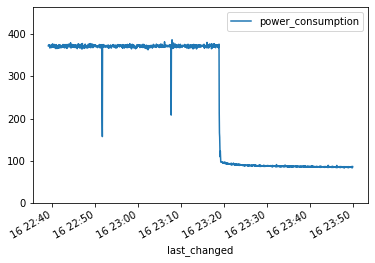

In [37]:
# df_subset = df.loc['2020-06-01':'2020-06-01'].between_time('8:00', '8:38')[['power_consumption']]
# df_subset[(df_subset != 0).all(1)].plot(ylim=(0,df_subset.max()*1.2))
start_date = '2020-06-16'
end_date = '2020-06-16'
start_time = '22:39'
end_time = '23:50'


subset_df = df.loc[start_date:end_date].between_time(start_time, end_time)[['power_consumption']]
y_max = subset_df['power_consumption'].max() * 1.2

subset_df[(df != 0).all(1)].plot(ylim=(0,y_max))

I don't get this. Why is the power consumption down to < 100

/Users/shivangi/Documents/power_monitor/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


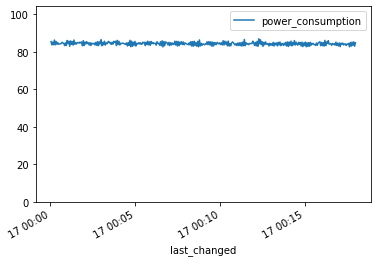

In [38]:
# df_subset = df.loc['2020-06-01':'2020-06-01'].between_time('8:00', '8:38')[['power_consumption']]
# df_subset[(df_subset != 0).all(1)].plot(ylim=(0,df_subset.max()*1.2))
start_date = '2020-06-17'
end_date = '2020-06-17'
start_time = '00:00'
end_time = '00:18'


subset_df2 = df.loc[start_date:end_date].between_time(start_time, end_time)[['power_consumption']]
y_max = subset_df2['power_consumption'].max() * 1.2

subset_df2[(df != 0).all(1)].plot(ylim=(0,y_max))

In [39]:
subset_df[(df != 0).all(1)].describe()

/Users/shivangi/Documents/power_monitor/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,power_consumption
count,1420.000000
mean,247.101170
std,140.800304
min,83.551000
25%,87.397750
50%,368.466500
75%,372.303500
max,386.806000


In [31]:
228 * 5991.57

1366077.96

In [24]:
plt.savefig('power.pdf')

<Figure size 432x288 with 0 Axes>